In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/purchase_history.csv')


In [ ]:
df.head()

,Customer ID,Gender,Age,Salary,Product ID,Price,Purchased
0,1,Female,49,61000,P01,2000,1
1,2,Male,36,30000,P02,2000,1
2,3,Female,26,81000,P02,3500,1
3,4,Female,32,74000,P01,7000,0
4,5,Female,42,56000,P01,5000,0


In [ ]:

X = df[['Customer ID', 'Purchased']]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

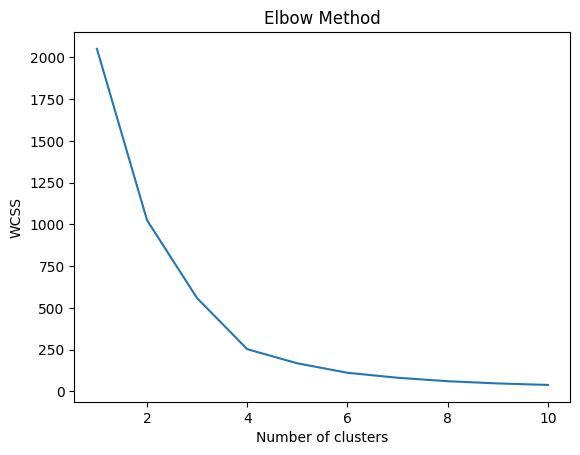

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

In [ ]:
df['cluster'] = clusters

In [ ]:
print(df.head())

   Customer ID  Gender  Age  Salary Product ID  Price  Purchased  cluster
0            1  Female   49   61000        P01   2000          1        0
1            2    Male   36   30000        P02   2000          1        0
2            3  Female   26   81000        P02   3500          1        0
3            4  Female   32   74000        P01   7000          0        1
4            5  Female   42   56000        P01   5000          0        1


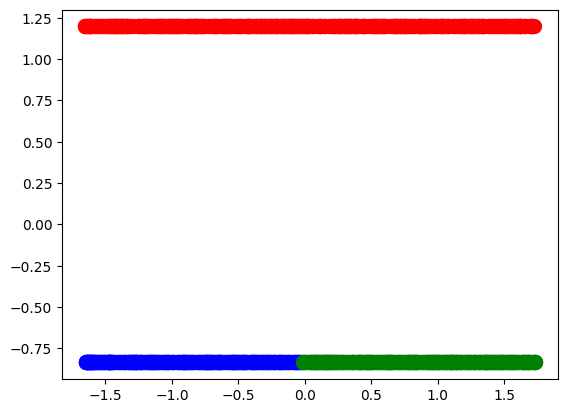

In [ ]:
plt.scatter(X_scaled[clusters == 0, 0], X_scaled[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[clusters == 1, 0], X_scaled[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[clusters == 2, 0], X_scaled[clusters == 2, 1], s=100, c='green', label='Cluster 3')

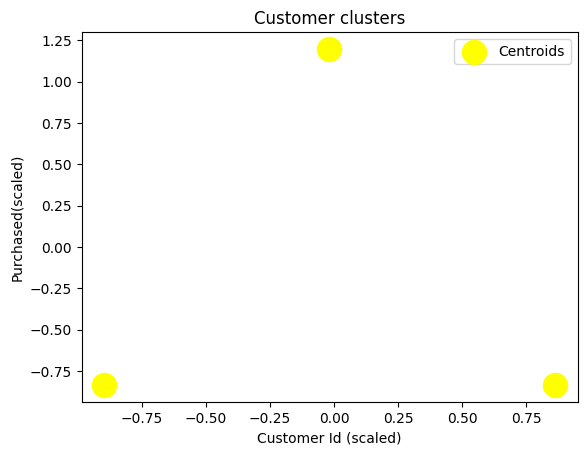

In [ ]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Customer clusters')
plt.xlabel('Customer Id (scaled)')
plt.ylabel('Purchased(scaled)')
plt.legend()
plt.show()